<a href="https://colab.research.google.com/github/qedir314/BTK-Akademi/blob/main/7_ClassificationModelsComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from sklearn.datasets import make_classification, make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

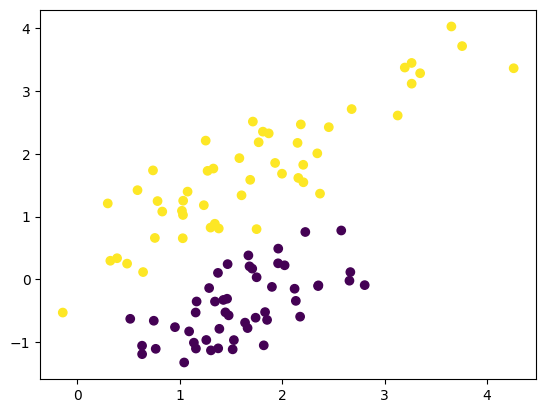

In [21]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
X += 1.2 * np.random.uniform(size = X.shape)
Xy = (X,y)  # dataset
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

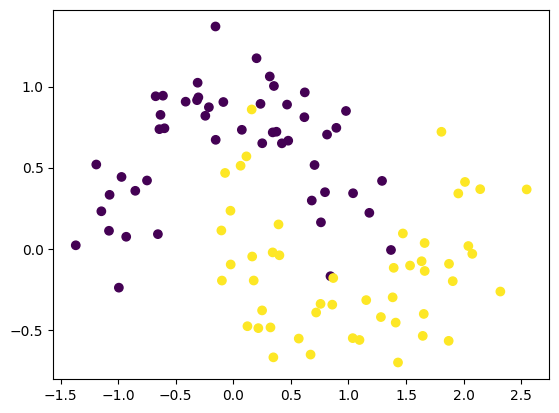

In [20]:
X, y = make_moons(noise=0.2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

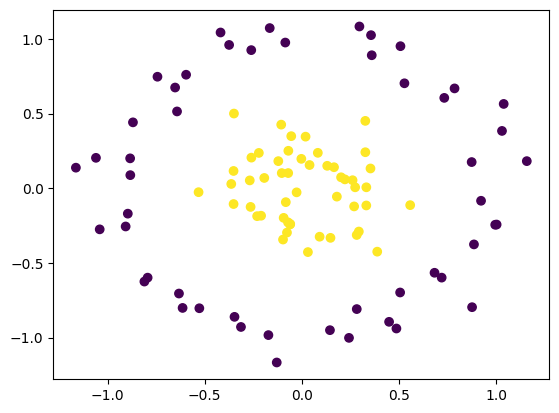

In [19]:
X, y = make_circles(noise=0.1, factor=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c = y)

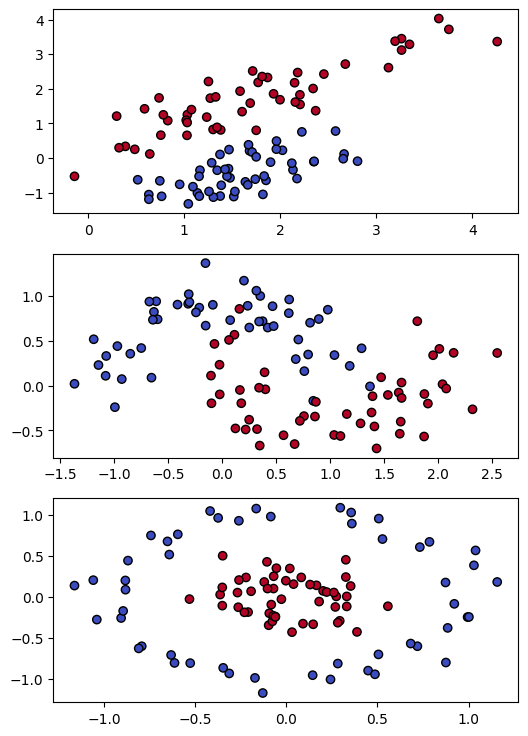

In [29]:
datasets = [Xy,
            make_moons(noise=0.2, random_state=42),
            make_circles(noise=0.1, factor=0.3, random_state=42)]
i = 1
fig = plt.figure(figsize=(6,9))
for ds_cnt, ds in enumerate(datasets):
  X, y = ds
  ax = plt.subplot(len(datasets), 1, i)
  ax.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.coolwarm, edgecolors="black")
  i += 1
plt.show()

In [32]:
names = ["KNN", "Linear SVM", "Decision Tree", "Random Forest", "Naive Bayes"]
classifiers = [KNeighborsClassifier(),
               SVC(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB()
               ]

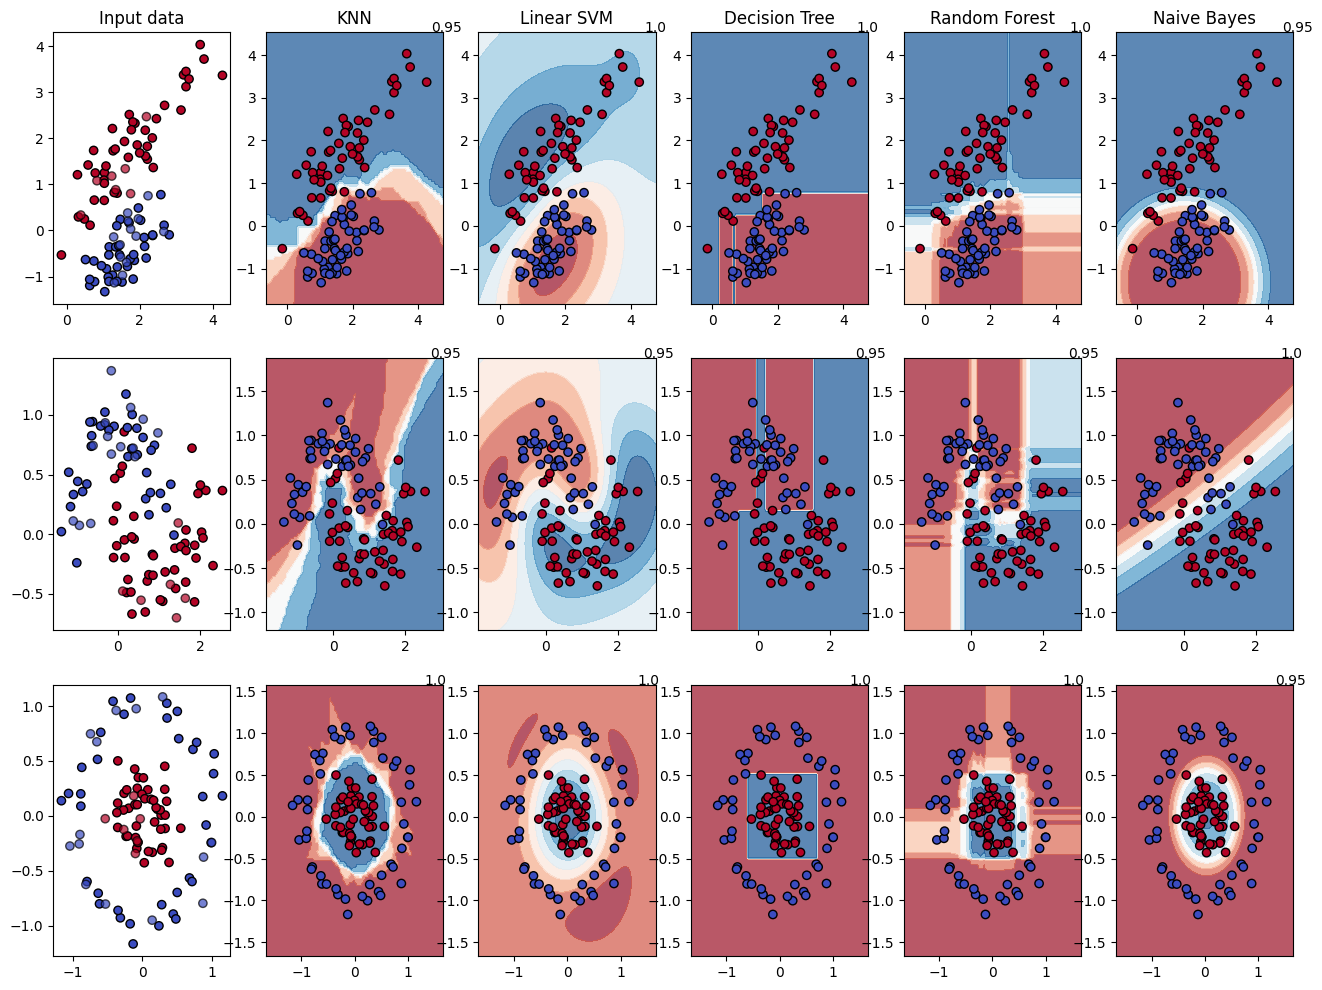

In [62]:
fig = plt.figure(figsize=(16,12))
i = 1
for ds_cnt, ds in enumerate(datasets):
  X, y = ds
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  cm_bright = ListedColormap(["darkred", "darkblue"])
  ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
  if ds_cnt == 0:
    ax.set_title("Input data")

  # plot training data
  ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap=plt.cm.coolwarm, edgecolors="black")

  # plot test data
  ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap=plt.cm.coolwarm, edgecolors="black", alpha=0.7)

  i += 1

  for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf = make_pipeline(StandardScaler(),
                        clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=plt.cm.RdBu, alpha=0.7, ax=ax, eps=0.5)
     # plot training data
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap=plt.cm.coolwarm, edgecolors="black")

    # plot test data
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap=plt.cm.coolwarm, edgecolors="black")

    if ds_cnt == 0:
      ax.set_title(name)
    ax.text(
        X[:,0].max() + 0.15,
        X[:,1].max() + 0.5,
        str(score)
    )
    i +=1